In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# first import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis

In [2]:
# Read a comma-separated values (csv) file into DataFrame.
pasta=pd.read_csv("ThermalMetricsyearly_NWIS-2.csv")    #, header= 0, usecols=[0, 1], engine{‘c’, ‘python’, ‘pyarrow’} ,na_filterbool, default True
pasta['site_id_st'] =  pasta['site_id'].astype(str)  
pasta

,site_id,AmpRatio,PhaseLag_d,Ratio_Mean,TS__Slope,AdjRsqr,YInt,max_conseq_missing_days,year,site_id_st
0,12309500,0.50,25.22,0.93,0.40,0.73,5.18,1.0,2015,12309500
1,12322000,0.58,22.96,0.98,0.47,0.75,5.03,1.0,2015,12322000
2,12413370,0.69,12.61,0.89,0.59,0.86,2.95,5.0,2015,12413370
3,13056500,0.95,-2.69,1.08,0.85,0.92,2.42,43.0,2015,13056500
4,13092747,0.49,5.37,1.04,0.43,0.90,7.20,1.0,2015,13092747
...,...,...,...,...,...,...,...,...,...,...
66,13340000,NaN,NaN,1.17,NaN,0.00,16.50,-inf,2017,13340000
67,13340600,NaN,NaN,1.19,NaN,0.00,13.00,-inf,2017,13340600
68,13341000,NaN,NaN,0.70,NaN,0.00,10.00,-inf,2017,13341000
69,13341050,NaN,NaN,0.92,NaN,0.00,13.00,-inf,2017,13341050


In [3]:
pasta = pasta.dropna(subset=['AmpRatio'])  # Remove rows with NA in 'col1' only
pasta = pasta[pasta["PhaseLag_d"]>-4 ]
pasta = pasta[pasta["Ratio_Mean"]<1 ]
pasta = pasta.groupby('site_id_st').mean()  # Group by 'col1'
pasta = pasta.reset_index()
#pasta['site_id_st'] =  pasta['site_id'].astype(str)  
#pasta['alt_va']=nwis.get_record(sites=  str(pasta['site_id']) , service='site')['alt_va']
print(pasta)

   site_id_st     site_id  AmpRatio  PhaseLag_d  Ratio_Mean  TS__Slope  \
0    12309500  12309500.0     0.555      23.515       0.960      0.450   
1    12322000  12322000.0     0.580      22.960       0.980      0.470   
2    12413370  12413370.0     0.660      14.425       0.890      0.560   
3    13192200  13192200.0     0.395      24.020       0.770      0.335   
4    13251000  13251000.0     0.990       5.810       0.920      0.800   
5    13266000  13266000.0     1.080       4.970       0.850      0.830   
6    13296000  13296000.0     0.770       4.200       0.885      0.640   
7    13310800  13310800.0     0.720       3.810       0.470      0.450   
8    13310850  13310850.0     0.810       2.780       0.470      0.490   
9    13311000  13311000.0     0.820       3.100       0.570      0.530   
10   13311250  13311250.0     0.740       9.820       0.730      0.570   
11   13311450  13311450.0     0.640       5.900       0.600      0.440   
12   13317000  13317000.0     0.945   

In [4]:
#str(pasta['site_id'])
pasta['alt_va']=nwis.get_record(sites=  pasta['site_id_st'], service='site')['alt_va']
pasta = pasta.dropna(subset=['alt_va']) 
pasta['drain_area_va']=nwis.get_record(sites=  pasta['site_id_st'], service='site')['drain_area_va']
pasta = pasta.dropna(subset=['drain_area_va']) 
pasta

,site_id_st,site_id,AmpRatio,PhaseLag_d,Ratio_Mean,TS__Slope,AdjRsqr,YInt,max_conseq_missing_days,year,alt_va,drain_area_va
0,12309500,12309500.0,0.555,23.515,0.960,0.450,0.750,4.995,2.5,2015.5,1700.00,12690.0
1,12322000,12322000.0,0.580,22.960,0.980,0.470,0.750,5.030,1.0,2015.0,1700.00,13700.0
2,12413370,12413370.0,0.660,14.425,0.890,0.560,0.840,3.150,5.5,2015.5,2490.00,28.2
4,13251000,13251000.0,0.990,5.810,0.920,0.800,0.810,2.520,1.0,2016.0,2138.44,1450.0
5,13266000,13266000.0,1.080,4.970,0.850,0.830,0.790,1.530,1.0,2016.0,2206.10,189.0
8,13310850,13310850.0,0.810,2.780,0.470,0.490,0.680,1.070,1.0,2016.0,6639.00,19.3
11,13311450,13311450.0,0.640,5.900,0.600,0.440,0.710,1.960,11.0,2016.0,5950.00,13421.0
13,13317660,13317660.0,0.840,19.880,0.895,0.665,0.760,3.360,1.0,2015.5,850.00,5507.0
14,13340000,13340000.0,1.045,13.065,0.885,0.950,0.840,-0.815,18.0,2015.5,993.89,1296.0
15,13340600,13340600.0,0.850,12.020,0.925,0.735,0.825,1.925,16.0,2015.5,1706.15,7976.0


In [5]:
# Lower Ar means higher groundwater influence
# Phase lag< -4: might be problematic

Text(0, 0.5, 'TS__Slope')

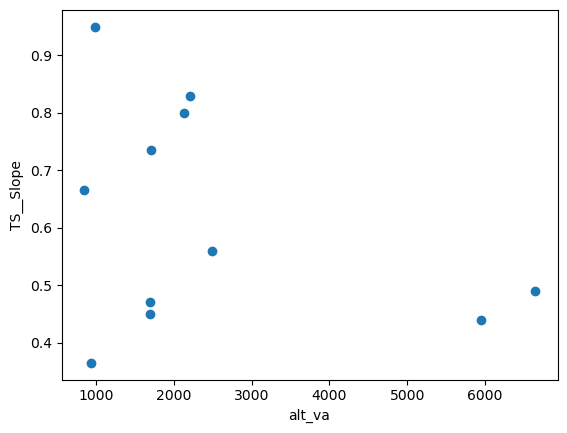

In [13]:
# Create a histogram 
#plt.hist(pasta['TS__Slope'])
plt.scatter( pasta['alt_va'],  pasta['TS__Slope'])
plt.xlabel("alt_va")
plt.ylabel("TS__Slope")

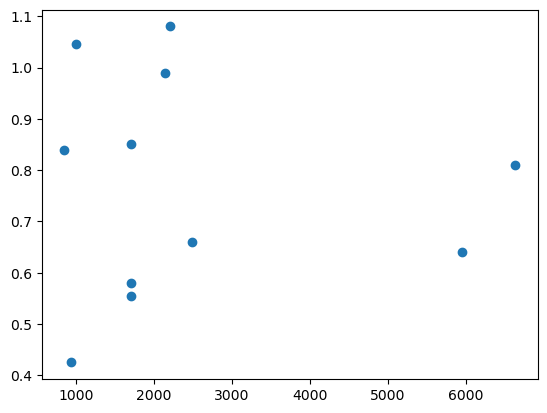

In [12]:
plt.scatter( pasta['alt_va'],  pasta['AmpRatio'])

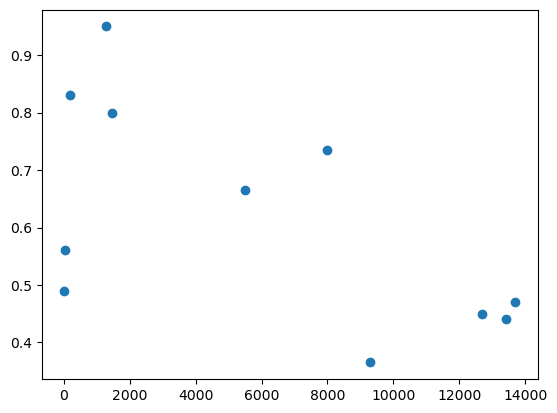

In [10]:
plt.scatter( pasta['drain_area_va'],  pasta['TS__Slope'])

In [8]:



# specify the USGS site code for which we want data.
site = '03339000'

# get instantaneous values (iv)
#df = nwis.get_record(sites=site, service='iv', start='2017-12-31', end='2018-01-01')

# get water quality samples (qwdata)
#df2 = nwis.get_record(sites=site, service='qwdata', start='2017-12-31', end='2018-01-01')

# get basic info about the site
site = nwis.get_record(sites=site, service='site')
site[['site_no',  'alt_va', 'basin_cd', 'drain_area_va', 'contrib_drain_area_va',  'aqfr_cd', 'aqfr_type_cd']]

,site_no,alt_va,basin_cd,drain_area_va,contrib_drain_area_va,aqfr_cd,aqfr_type_cd
0,03339000,503.72,NaN,1290,NaN,NaN,NaN


In [9]:
nwis.get_record(sites= '03339000', service='site')['alt_va']

0    503.72
Name: alt_va, dtype: float64